In [1]:
from imutils import paths
import numpy as np
import shutil
import json
import cv2
import os

import matplotlib.patches as patches
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def make_dir(dirName):
    # Create a target directory & all intermediate 
    # directories if they don't exists
    if not os.path.exists(dirName):
        os.makedirs(dirName, exist_ok = True)
        print("[INFO] Directory " ,dirName,  " created")
    else:
        print("[INFO] Directory " ,dirName,  " already exists") 

In [3]:
# Get paths to images and ljson labels
DATASET = "/workspace/original-external/artisticfaces"
imagesList = sorted(list(paths.list_images(DATASET)))
labelsList = sorted(list(paths.list_files(DATASET, validExts='ljson')))

In [4]:
def show_image(i):
    # Load and display the image
    image = cv2.imread(imagesList[i])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(12, 8), dpi=80)
    plt.imshow(image)
    
    # Read landmark positions from ljson file and display
    jsonFile = open(labelsList[i])
    label = json.load(jsonFile) 
    landmarks = np.array(label["landmarks"]["points"])
    plt.scatter(landmarks[:,1], landmarks[:,0])

    # Get top-left, bottom-right coordinates from landmarks
    xs = min(landmarks[:,1])
    ys = min(landmarks[:,0])
    xe = max(landmarks[:,1])
    ye = max(landmarks[:,0])
    
    # Adjust the top
    h = ye-ys
    w = xe-xs
    ys -= 0.15*h

    print(xs, ys, xe, ye)

    # Show the rectangle
    ax = plt.gca()
    rect = patches.Rectangle((xs, ys), xe-xs, ye-ys, linewidth=1, edgecolor='r',facecolor='none')
    ax.add_patch(rect)

61.0 42.86167753751097 205.0 243.25548308326017


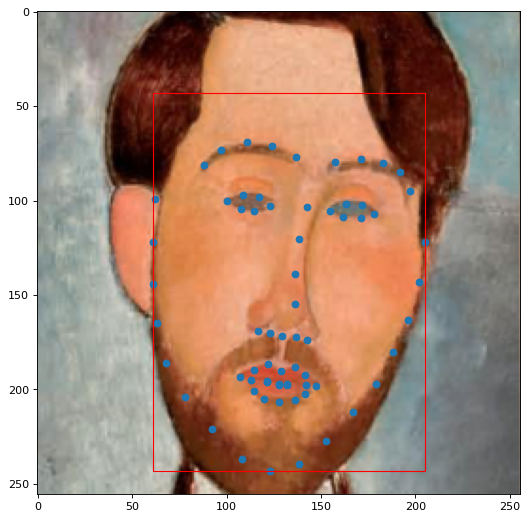

In [5]:
show_image(0)

60.38625311491225 33.50804131313069 208.0 235.00164284827542


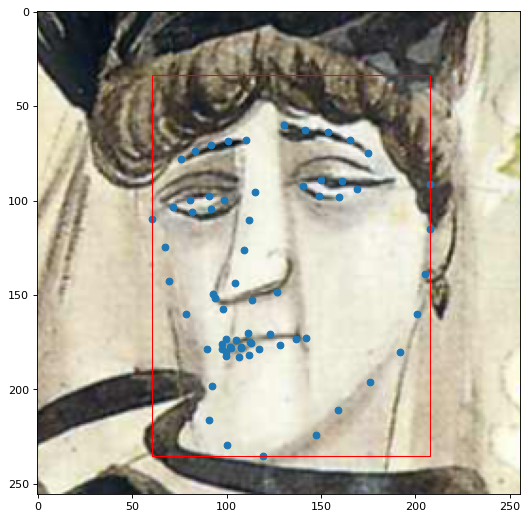

In [6]:
show_image(100)

In [9]:
# Create new directories for images and labels
NEW_DATASET = "/workspace/dataset/animefaces"
make_dir(os.path.join(NEW_DATASET, 'images'))
make_dir(os.path.join(NEW_DATASET, 'labels_eval'))

[INFO] Directory  /workspace/dataset-test/animefaces/images  created
[INFO] Directory  /workspace/dataset-test/animefaces/labels_eval  created


In [10]:
# Copy images
for imagePath in imagesList:
    des = os.path.join(NEW_DATASET, 'images', imagePath.split('/')[-1])
    shutil.copyfile(imagePath, des)

In [12]:
i = 1

for labelPath in labelsList:
    print("Processing: {}/{}".format(i, len(labelsList)))
    
    # Read json file and get the bounding box coordinates
    jsonFile = open(labelPath)
    label = json.load(jsonFile) 
    landmarks = np.array(label["landmarks"]["points"])
    
    xs = min(landmarks[:,1])
    ys = min(landmarks[:,0])
    xe = max(landmarks[:,1])
    ye = max(landmarks[:,0])
    h = ye-ys
    w = xe-xs
    ys -= 0.15*h

    # Write bounding boxes to a txt file
    labelFile = open("{}.txt".format(os.path.join(NEW_DATASET, 'labels_eval', labelPath.split('/')[-1].split('.')[0])), "w")
    labelFile.write('face {} {} {} {} -1 -1 -1 -1 -1 -1 -1 -1 -1 -1\n'.format(int(xs), int(ys), int(xe-xs), int(ye-ys)))
    labelFile.close()
    
    i += 1

Processing: 1/160
Processing: 2/160
Processing: 3/160
Processing: 4/160
Processing: 5/160
Processing: 6/160
Processing: 7/160
Processing: 8/160
Processing: 9/160
Processing: 10/160
Processing: 11/160
Processing: 12/160
Processing: 13/160
Processing: 14/160
Processing: 15/160
Processing: 16/160
Processing: 17/160
Processing: 18/160
Processing: 19/160
Processing: 20/160
Processing: 21/160
Processing: 22/160
Processing: 23/160
Processing: 24/160
Processing: 25/160
Processing: 26/160
Processing: 27/160
Processing: 28/160
Processing: 29/160
Processing: 30/160
Processing: 31/160
Processing: 32/160
Processing: 33/160
Processing: 34/160
Processing: 35/160
Processing: 36/160
Processing: 37/160
Processing: 38/160
Processing: 39/160
Processing: 40/160
Processing: 41/160
Processing: 42/160
Processing: 43/160
Processing: 44/160
Processing: 45/160
Processing: 46/160
Processing: 47/160
Processing: 48/160
Processing: 49/160
Processing: 50/160
Processing: 51/160
Processing: 52/160
Processing: 53/160
Pr